In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
sns.set_style('whitegrid')

In [4]:
df=pd.read_csv('german_credit_data.csv', index_col=0)

In [5]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [7]:
df.shape

(1000, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,1000,2,good,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df["Job"].unique()

array([2, 1, 3, 0])

In [11]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
df = df.dropna().reset_index(drop=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


In [13]:
df.drop(columns='Unnamed: 0',inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [14]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Text(0.5, 0.98, 'Distribution of Numerical Features')

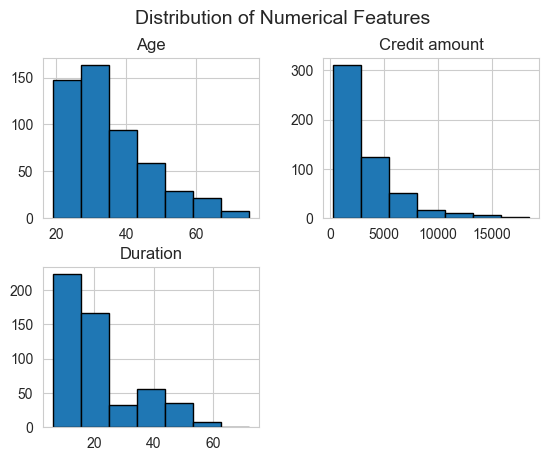

In [16]:
df[['Age','Credit amount','Duration']].hist(bins=7,edgecolor='black')
plt.suptitle('Distribution of Numerical Features',fontsize=14)

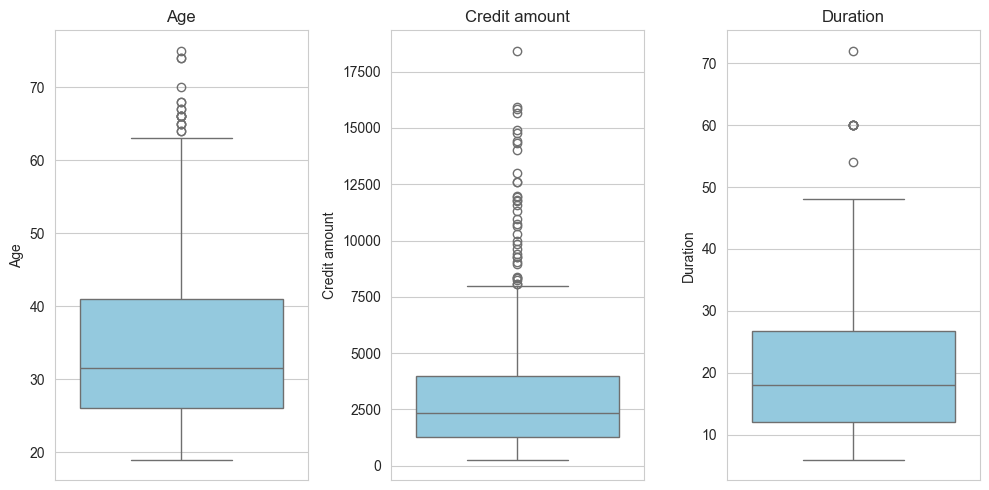

In [17]:
plt.figure(figsize=(10,5))
for i,col in enumerate(['Age','Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(col)

plt.tight_layout()

In [18]:
df.query("Duration>=60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [19]:
categorical_cols=['Sex','Job','Housing','Saving accounts','Checking account','Purpose']

C:\Users\admin\AppData\Local\Temp\ipykernel_16912\4195804488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2",order=df[col].value_counts().index)
C:\Users\admin\AppData\Local\Temp\ipykernel_16912\4195804488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2",order=df[col].value_counts().index)
C:\Users\admin\AppData\Local\Temp\ipykernel_16912\4195804488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2",order=df[col].value_counts().index)
C:\User

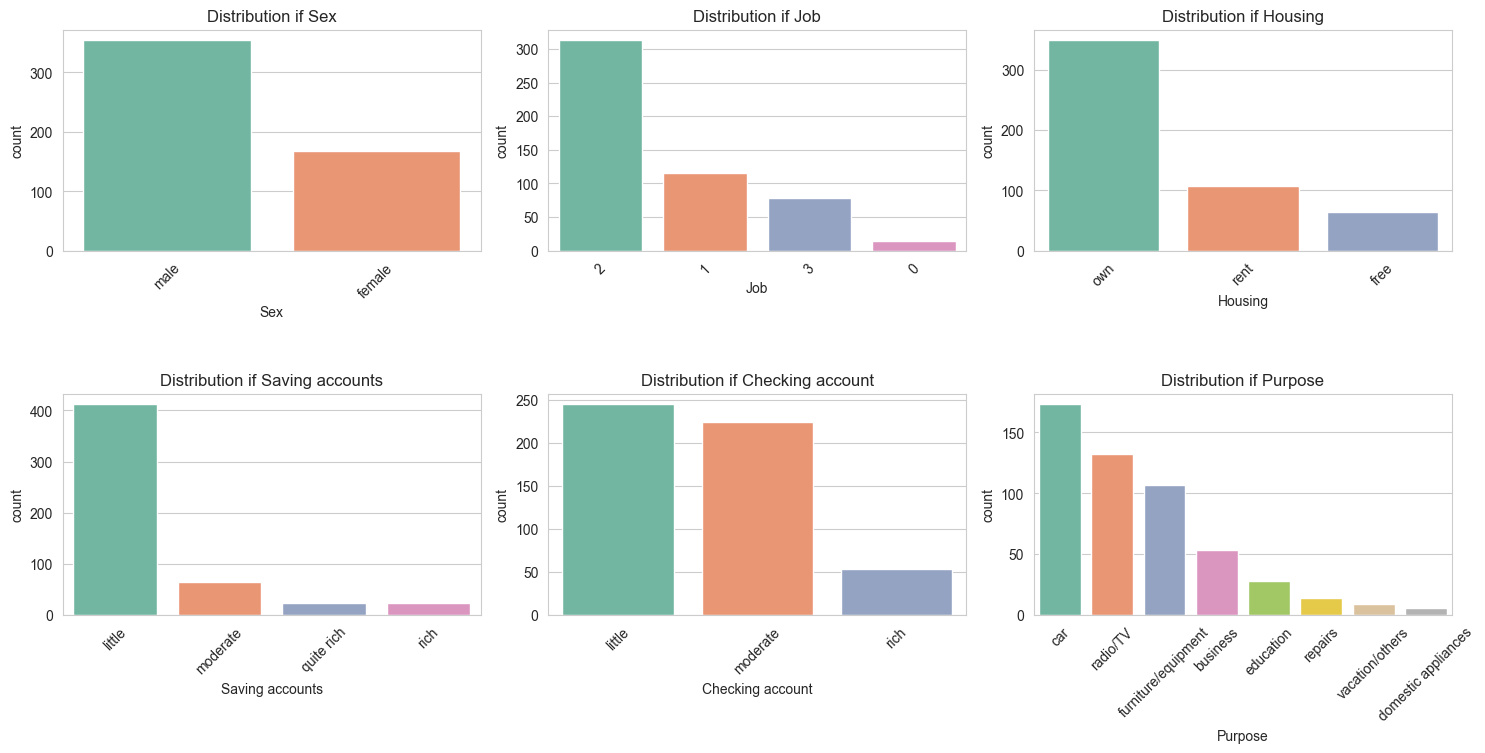

In [20]:
plt.figure(figsize=(15,10))
for i ,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette="Set2",order=df[col].value_counts().index)
    plt.title(f"Distribution if {col}")
    plt.xticks(rotation=45)
plt.tight_layout()

In [21]:
corr=df[['Age','Job','Credit amount','Duration']].corr()

In [22]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<Axes: >

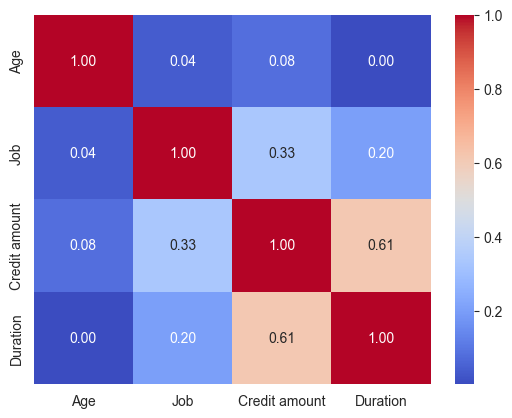

In [23]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")

In [24]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [25]:
df.groupby('Job')['Credit amount'].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [26]:
pd.pivot_table(df,values="Credit amount",index="Housing",columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


In [27]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

C:\Users\admin\AppData\Local\Temp\ipykernel_16912\3066340548.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts", y='Credit amount', palette='pastel')


Text(0.5, 1.0, 'Credit amount Distribution')

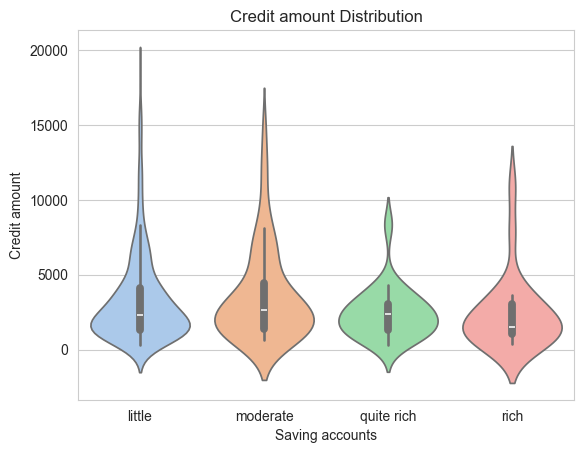

In [28]:
sns.violinplot(data=df, x="Saving accounts", y='Credit amount', palette='pastel')
plt.title('Credit amount Distribution')


Text(0.5, 1.0, 'Credit Amount vs Age colored by sex and sized by duration')

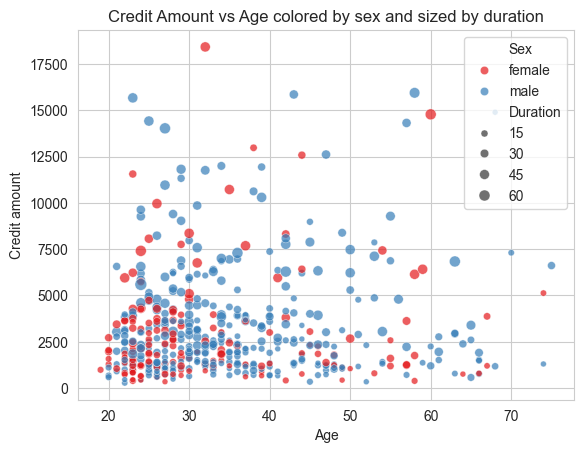

In [29]:
sns.scatterplot(data=df,x="Age",y="Credit amount",hue="Sex",size="Duration",alpha=0.7,palette='Set1')
plt.title('Credit Amount vs Age colored by sex and sized by duration')

In [30]:
df['Risk'].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

In [31]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

C:\Users\admin\AppData\Local\Temp\ipykernel_16912\4032813492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")
C:\Users\admin\AppData\Local\Temp\ipykernel_16912\4032813492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")
C:\Users\admin\AppData\Local\Temp\ipykernel_16912\4032813492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")


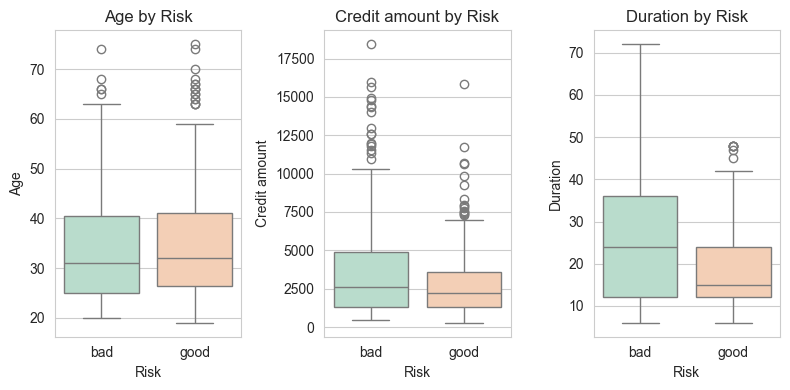

In [32]:
plt.figure(figsize=(8,4))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")
    plt.title(f"{col} by Risk")

plt.tight_layout()

In [33]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [34]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

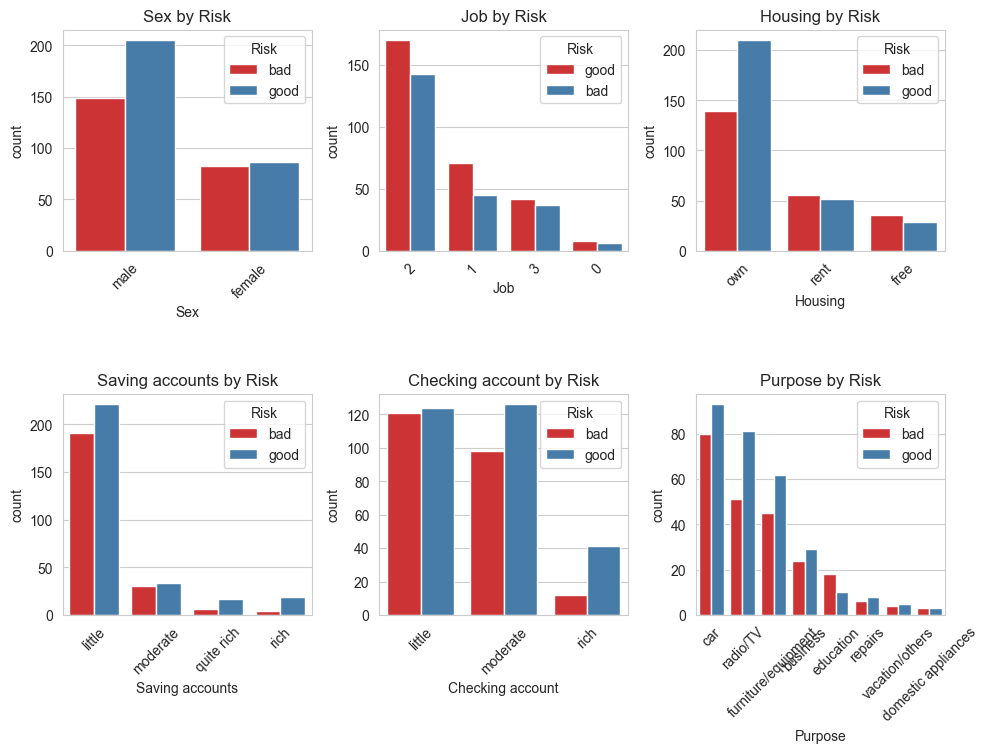

In [35]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue="Risk",palette='Set1',order=df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()

In [36]:
features=['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration']

In [37]:
target='Risk'

In [38]:
df_model=df[features+[target]].copy()

In [39]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [40]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [41]:
cat_cols=df_model.select_dtypes(include='object').columns.drop('Risk')

In [42]:
le_dict={}

In [43]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [44]:
for col in cat_cols:
    le=LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    le_dict[col]=le
    le_dict[col]=le
    joblib.dump(le,f"{col}_encoder.pkl")

In [45]:
le_target=LabelEncoder()

In [46]:
target

'Risk'

In [47]:
df_model[target]=le_target.fit_transform(df_model[target])

In [48]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [49]:
joblib.dump(le_target,'target_encoder.pkl')

['target_encoder.pkl']

In [50]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X=df_model.drop(target,axis=1)

In [53]:
y=df_model[target]

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [55]:
X_train.shape

(417, 8)

In [56]:
X_test.shape

(105, 8)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [58]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    params = grid.best_params_
    return best_model, accuracy, params


In [59]:
dt=DecisionTreeClassifier(random_state=1,class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
best_dt,acc_dt,params_dt=train_model(dt,dt_param_grid,X_train,y_train,X_test,y_test)

In [61]:
print("Decision Tree Accuracy",acc_dt)

Decision Tree Accuracy 0.580952380952381


In [62]:
print("Best paramters",params_dt)

Best paramters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [63]:
rf=RandomForestClassifier(random_state=1,class_weight='balanced',n_jobs=-1)

In [64]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [65]:
best_rf,acc_rf,params_rf=train_model(rf,rf_param_grid,X_train,y_train,X_test,y_test)

In [66]:
print("Random Forest Accuracy",acc_rf)

Random Forest Accuracy 0.6190476190476191


In [67]:
print('Best params',params_rf)

Best params {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [68]:
et=ExtraTreesClassifier(random_state=1,class_weight='balanced',n_jobs=-1)

In [69]:
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [70]:
best_et,acc_et,params_et=train_model(et,et_param_grid,X_train,y_train,X_test,y_test)

In [71]:
print('Extra Tree',acc_et)

Extra Tree 0.6476190476190476


In [72]:
print("Best Params",params_et)

Best Params {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [73]:
xgb=XGBClassifier(random_state=1,scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),use_label_encoder=False,eval_metric='logloss')

In [74]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10,],
    "learning_rate":[0.01,0.1,0.2],
    "subsample":[0.7,1],
    "colsample_bytree":[0.7,1]
}

In [76]:
best_xgb,acc_xgb,params_xgb=train_model(xgb,xgb_param_grid,X_train,y_train,X_test,y_test)

D:\deep_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:03:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\deep_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\deep_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\deep_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, ite

In [77]:
print('Xgb accuracy',acc_xgb)

Xgb accuracy 0.6190476190476191


In [78]:
print("Best params",params_xgb)

Best params {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


In [79]:
best_et.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [80]:
joblib.dump(best_et,"extra_tree_credit_model.pkl")

['extra_tree_credit_model.pkl']